In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
%matplotlib inline

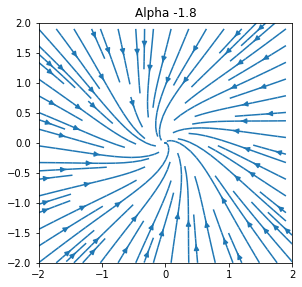

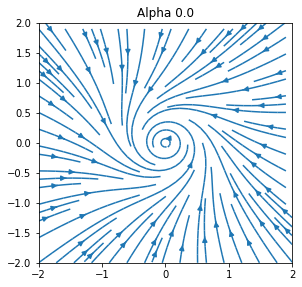

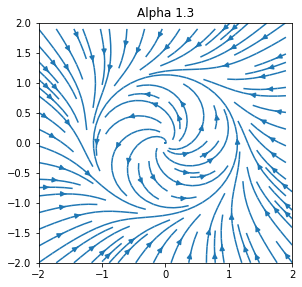

In [2]:
w = 2
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]

for alpha in [-1.8, 0.0, 1.3]:  
    U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(x1, x2, U, V)
    ax0.set_title(f"Alpha {alpha}")

Text(0.5, 1.0, 'Two Orbits for Alpha = 1')

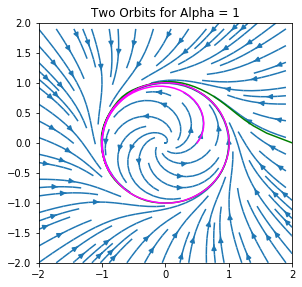

In [3]:
alpha = 1

def f(t, r):
    x1, x2 = r
    f1 = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    f2 = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    return f1, f2

sol = solve_ivp(f, (0, 10), (2, 0), t_eval=np.linspace(0, 10, 100))
xf, yf = sol.y

sol = solve_ivp(f, (0, 10), (0.5, 0), t_eval=np.linspace(0, 10, 100))
xs, ys = sol.y

U = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
V = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))

fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(x1, x2, U, V)
ax0.plot(xf, yf, color='green')
ax0.plot(xs, ys, color='magenta')
ax0.set_title(f"Two Orbits for Alpha = {alpha}")

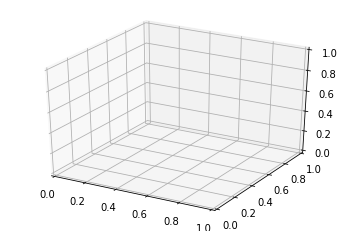

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [5]:
def f(a1, a2):
    return np.sin(np.sqrt(a1 ** 2 + a2 ** 2))

a1 = np.linspace(-6, 6, 30)
a2 = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(a1, a2)
Z = f(X, Y)

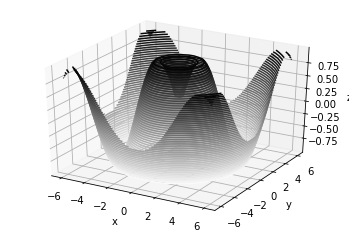

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

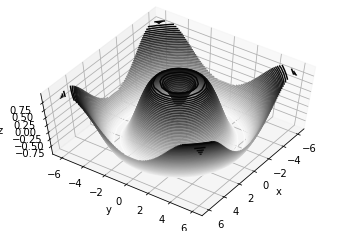

In [7]:
ax.view_init(60, 35)
fig